In [76]:
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
plt.rcParams['font.family'] = 'NanumGothic'
import platform
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False

# Warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import os
path = os.path.dirname(os.getcwd())
path = os.path.dirname(path)
path = os.path.join(path, "/Users/seungji/Desktop/Dacon/Daesamanlap/ProcessedData")
train = pd.read_csv(os.path.join(path,"merged_train.csv"))
test = pd.read_csv(os.path.join(path,"merged_test.csv"))

1보다 큰 지역

- 세종특별자치시
- 울산광역시 공공임대(10년)
- 대구광역시 공공임대(10년)
- 전라남도 영구임대 
- 전라남도 공공임대(10년)
- 강원도 공공임대(50년) 공공임대(10년) 행복주택 
- 경상남도 공공임대(50년)/공공임대(10년)
- 경상북도 국민임대 
- 서울특별시 
- 경기도 공공임대(10년)
- 대전광역시 공공임대(5년)/행복주택/공공분양/공공분양(분납)/공공임대(10년)
- 부산광역시 공공임대(50년)
- 전라북도 영구임대/공공임대(10년)/행복주택
- 충청남도 공공임대(50년)
- 충청북도 공공임대(50년)

1보다 작은 지역

- 울산광역시 국민임대
- 대구광역시 영구임대/행복주택
- 전라남도 행복주택 
- 강원도 영구임대 
- 경상남도 행복주택/ 영구임대
- 경상북도 행복주택 
- 경기도 행복주택/ 영구임대 
- 대전광역시 영구임대/공공임대(50년)
- 부산광역시 행복주택/영구임대/국민임대
- 광주광역시 영구임대
- 충청북도 영구임대/ 행복주택

In [77]:
train['공급유형'].unique()

array(['국민임대', '공공임대(50년)', '영구임대', '공공임대(10년)', '공공임대(분납)', '장기전세',
       '공공분양', '행복주택', '공공임대(5년)', '임대상가'], dtype=object)

In [78]:
tmp = train.groupby(['단지코드','임대건물구분']).count().iloc[:,:1].reset_index()
store = tmp[tmp['임대건물구분']=='상가'].reset_index(drop=True)[['단지코드','총세대수']].rename(columns={'총세대수':'상가수'})
apt = tmp[tmp['임대건물구분']=='아파트'].reset_index(drop=True)[['단지코드','총세대수']].rename(columns={'총세대수':'아파트수'})
total = pd.merge(apt,store,on='단지코드',how='left').fillna(0)
total['상가비율'] = total.apply(lambda x : x['상가수']/(x['아파트수']+x['상가수']),axis=1)
train = pd.merge(train,total[['단지코드','상가비율']],on='단지코드',how='left')

tmp = test.groupby(['단지코드','임대건물구분']).count().iloc[:,:1].reset_index()
store = tmp[tmp['임대건물구분']=='상가'].reset_index(drop=True)[['단지코드','총세대수']].rename(columns={'총세대수':'상가수'})
apt = tmp[tmp['임대건물구분']=='아파트'].reset_index(drop=True)[['단지코드','총세대수']].rename(columns={'총세대수':'아파트수'})
total = pd.merge(apt,store,on='단지코드',how='left').fillna(0)
total['상가비율'] = total.apply(lambda x : x['상가수']/(x['아파트수']+x['상가수']),axis=1)
test = pd.merge(test,total[['단지코드','상가비율']],on='단지코드',how='left')

In [79]:
train = train[train['임대건물구분']=='아파트']
test = test[test['임대건물구분']=='아파트']

In [80]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [81]:
train.shape

(2334, 35)

In [82]:
area = ['경상남도', '전라북도', '강원도', '광주광역시', '충청남도', '제주특별자치도', '울산광역시', '충청북도', '전라남도', '경상북도', '세종특별자치시']
for ind in range(train.shape[0]):
    if train.loc[ind,'지역'] in area :
        train.loc[ind,'환승역 수'] = 0

area = ['경상남도', '전라북도', '강원도', '광주광역시', '충청남도', '제주특별자치도', '울산광역시', '충청북도', '전라남도', '경상북도', '세종특별자치시']
for ind in range(test.shape[0]):
    if test.loc[ind,'지역'] in area :
        test.loc[ind,'환승역 수'] = 0

In [83]:
train['공가비율'] = train.apply(lambda x : x['공가수']/x['총세대수'],axis=1)
test['공가비율'] = test.apply(lambda x : x['공가수']/x['총세대수'],axis=1)

In [84]:
train['0~19 인구수'] = train['0~19세_비율']*train['총세대수']
train['20~39 인구수'] = train['20~39세_비율']*train['총세대수']
train['40~69 인구수'] = train['40~69세_비율']*train['총세대수']
train['70세이상 인구수'] = train['70세이상_비율']*train['총세대수']

test['0~19 인구수'] = test['0~19세_비율']*test['총세대수']
test['20~39 인구수'] = test['20~39세_비율']*test['총세대수']
test['40~69 인구수'] = test['40~69세_비율']*test['총세대수']
test['70세이상 인구수'] = test['70세이상_비율']*test['총세대수']

In [85]:
def func(x):
    for i in range(10,90,10):
        if int(x) in range(i,i+10):
            return i+5

train['전용면적'] = train['전용면적'].apply(lambda x : func(x))
test['전용면적'] = test['전용면적'].apply(lambda x : func(x))

In [86]:
train = train.join(pd.get_dummies(train['공급유형']))
test = test.join(pd.get_dummies(test['공급유형']))
test['공공분양'] = 0
test['공공임대(5년)'] = 0 
test['장기전세'] = 0

In [87]:
not_unique = ['자격유형','임대보증금','임대료','전용면적별세대수','전용면적','공급유형']

In [88]:
tmp1 = train.drop(not_unique,axis=1).drop_duplicates()

tmp = pd.DataFrame(train.groupby(['단지코드','전용면적','공급유형']).sum()['전용면적별세대수']).reset_index()
tmp = pd.merge(tmp,tmp1.drop_duplicates(),on='단지코드',how='left')
total = pd.DataFrame(tmp.groupby('단지코드').sum()['전용면적별세대수']).reset_index(drop=False).rename(columns={'전용면적별세대수':'total'})
tmp = pd.merge(tmp,total,on='단지코드',how='left')
tmp['ratio'] = tmp.apply(lambda x : x['전용면적별세대수']/x['total'],axis=1)
tmp['y1'] = tmp.apply(lambda x : x['ratio']*x['등록차량수'],axis=1)

total = pd.DataFrame(train.groupby(['단지코드','전용면적','공급유형']).mean()['임대료']).reset_index()
tmp = pd.merge(tmp,total,on=['단지코드','전용면적','공급유형'],how='left')

total = pd.DataFrame(train.groupby(['단지코드','전용면적','공급유형']).mean()['임대보증금']).reset_index()
tmp = pd.merge(tmp,total,on=['단지코드','전용면적','공급유형'],how='left')

tmp['단지내주차면수_new'] = tmp.apply(lambda x : x['단지내주차면수']*x['ratio'],axis=1)
tmp = tmp.drop(['ratio'],axis=1)

train = tmp
train['y2'] = train.apply(lambda x : x['y1']/x['단지내주차면수_new'],axis=1)

In [89]:
tmp1 = test.drop(not_unique,axis=1).drop_duplicates()

tmp = pd.DataFrame(test.groupby(['단지코드','전용면적','공급유형']).sum()['전용면적별세대수']).reset_index()
tmp = pd.merge(tmp,tmp1.drop_duplicates(),on='단지코드',how='left')
total = pd.DataFrame(tmp.groupby('단지코드').sum()['전용면적별세대수']).reset_index(drop=False).rename(columns={'전용면적별세대수':'total'})
tmp = pd.merge(tmp,total,on='단지코드',how='left')
tmp['ratio'] = tmp.apply(lambda x : x['전용면적별세대수']/x['total'],axis=1)

total = pd.DataFrame(test.groupby(['단지코드','전용면적','공급유형']).mean()['임대료']).reset_index()
tmp = pd.merge(tmp,total,on=['단지코드','전용면적','공급유형'],how='left')

total = pd.DataFrame(test.groupby(['단지코드','전용면적','공급유형']).mean()['임대보증금']).reset_index()
tmp = pd.merge(tmp,total,on=['단지코드','전용면적','공급유형'],how='left')

tmp['단지내주차면수_new'] = tmp.apply(lambda x : x['단지내주차면수']*x['ratio'],axis=1)
tmp = tmp.drop(['ratio'],axis=1)

test = tmp

In [90]:
train['0~19 인구수'] = train['0~19세_비율']*train['전용면적별세대수']
train['20~39 인구수'] = train['20~39세_비율']*train['전용면적별세대수']
train['40~69 인구수'] = train['40~69세_비율']*train['전용면적별세대수']
train['70세이상 인구수'] = train['70세이상_비율']*train['전용면적별세대수']

test['0~19 인구수'] = test['0~19세_비율']*test['전용면적별세대수']
test['20~39 인구수'] = test['20~39세_비율']*test['전용면적별세대수']
test['40~69 인구수'] = test['40~69세_비율']*test['전용면적별세대수']
test['70세이상 인구수'] = test['70세이상_비율']*test['전용면적별세대수']

col = ['0~19세_비율','20~39세_비율','40~69세_비율','70세이상_비율']
train = train.drop(col,axis=1)
test = test.drop(col,axis=1)

In [91]:
train.columns

Index(['단지코드', '전용면적', '공급유형', '전용면적별세대수', '총세대수', '임대건물구분', '지역', '공가수',
       '지하철역', '버스정류장', '단지내주차면수', '등록차량수', '단지명', '도로명주소', '연면적', '위도', '경도',
       'subway_name', 'subway_dist', '환승역 수', '총인구수', '세대당_인구', '남/여비율',
       '남/여_0~19세', '남/여_20~39세', '남/여_40~69세', '남/여_70세이상', '상가비율', '공가비율',
       '0~19 인구수', '20~39 인구수', '40~69 인구수', '70세이상 인구수', '공공분양', '공공임대(10년)',
       '공공임대(50년)', '공공임대(5년)', '공공임대(분납)', '국민임대', '영구임대', '장기전세', '행복주택',
       'total', 'y1', '임대료', '임대보증금', '단지내주차면수_new', 'y2'],
      dtype='object')

In [92]:
# import smogn
# sns.kdeplot(train['y2'], label = "Original")
# sns.kdeplot(tr_smogn['y2'], label = "Modified")
# tr_smogn = smogn.smoter(
    
#     data = train,  ## pandas dataframe
#     y = 'y2',  ## string ('header name')
#      samp_method = 'extreme'
    

# )

In [93]:
train.corr()['y2']

전용면적           0.272737
전용면적별세대수      -0.072524
총세대수          -0.145421
공가수           -0.265737
지하철역          -0.063657
버스정류장          0.036348
단지내주차면수       -0.050276
등록차량수          0.363013
연면적            0.005723
위도            -0.041786
경도             0.083341
subway_dist   -0.000263
환승역 수         -0.039037
총인구수          -0.082692
세대당_인구         0.039506
남/여비율          0.006577
남/여_0~19세     -0.020200
남/여_20~39세     0.015812
남/여_40~69세    -0.022726
남/여_70세이상      0.016666
상가비율          -0.137332
공가비율          -0.099302
0~19 인구수      -0.050625
20~39 인구수     -0.067115
40~69 인구수     -0.074199
70세이상 인구수     -0.084072
공공분양           0.083793
공공임대(10년)      0.270612
공공임대(50년)      0.138447
공공임대(5년)       0.028804
공공임대(분납)       0.060542
국민임대          -0.060507
영구임대          -0.148812
장기전세           0.002327
행복주택          -0.074147
total         -0.013923
y1             0.300276
임대료            0.273141
임대보증금          0.084868
단지내주차면수_new   -0.004911
y2             1.000000
Name: y2, dtype:

<AxesSubplot:xlabel='y2', ylabel='Count'>

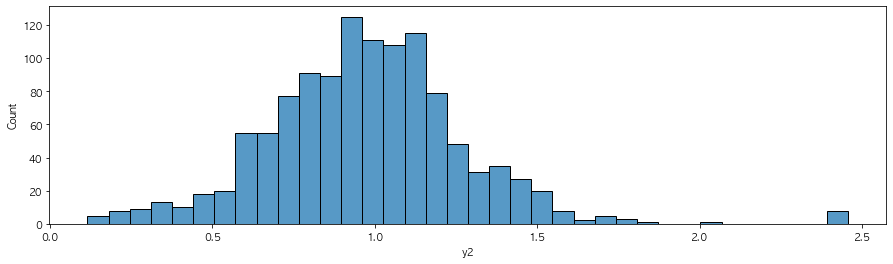

In [94]:
fig,ax = plt.subplots(figsize=(15,4))
sns.histplot(train['y2'])

In [95]:
train[train['y2']>2][['단지코드','y1','단지내주차면수_new','y2']] 

,단지코드,y1,단지내주차면수_new,y2
21,C1026,422.000000,205.000000,2.058537
437,C1722,60.212329,24.493151,2.458333
438,C1722,60.212329,24.493151,2.458333
439,C1722,35.965753,14.630137,2.458333
440,C1722,35.965753,14.630137,2.458333
441,C1722,60.212329,24.493151,2.458333
442,C1722,60.212329,24.493151,2.458333
443,C1722,168.109589,68.383562,2.458333
444,C1722,168.109589,68.383562,2.458333


In [96]:
train = train[train['단지코드']!='C1722']
train = train.reset_index(drop=True)

<AxesSubplot:xlabel='y2', ylabel='Count'>

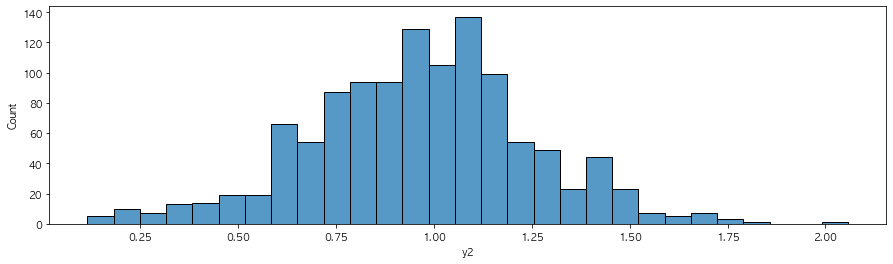

In [97]:
fig,ax = plt.subplots(figsize=(15,4))
sns.histplot(train['y2'])

In [98]:
# q = list(train.y2.quantile([0,.34,.66,1.0]))
# q
# train["y_class"] = [99]*len(train)
# for i in range(len(q[:-1])):
#     train.loc[(train.y2>=q[i])&(train.y2<q[i+1]),"y_class"] = i
# train.loc[train.y2==q[3],"y_class"] = 2

In [99]:
# coll = list(set(train.columns) - set(['단지코드','등록차량수','임대건물구분','subway_name','단지명','도로명주소','total','단지내주차면수','y1','y2','위도','경도','공급유형','연면적','단지내주차면수_new','index']))

In [100]:
raw = pd.read_csv(os.path.join(path,"merged_train.csv"))
get_uni = raw.groupby(["단지코드","공급유형"]).sum().reset_index()[["단지코드","공급유형"]]
tmp = get_uni.groupby("단지코드").nunique().reset_index()
tmp2 = get_uni[get_uni.단지코드.isin(tmp.loc[tmp.공급유형 == 1,"단지코드"])]
dj = list(tmp2.loc[tmp2.공급유형 == "국민임대","단지코드"])

In [101]:
tmp.columns

Index(['단지코드', '공급유형'], dtype='object')

In [102]:
# col = ['전용면적별세대수', '총세대수','공가수',
#        '지하철역', '버스정류장', '단지내주차면수', '등록차량수', '연면적', '위도', '경도',
#   'subway_dist', '환승역 수', '총인구수', '세대당_인구', '남/여비율',
#        '남/여_0~19세', '남/여_20~39세', '남/여_40~69세', '남/여_70세이상', '상가비율', '공가비율',
#        '0~19 인구수', '20~39 인구수', '40~69 인구수', '70세이상 인구수', '공공분양', '공공임대(10년)',
#        '공공임대(50년)', '공공임대(5년)', '공공임대(분납)', '국민임대', '영구임대', '장기전세', '행복주택',
#      '임대료', '임대보증금', '단지내주차면수_new', 
#        '전용면적*공가비율', '전용면적/임대료', '임대료/전용면적', '총세대수*전용면적']

In [ ]:
raw = pd.read_csv(os.path.join(path,"merged_train.csv"))
reg = train.groupby("지역").mean()["등록차량수"].reset_index()
train["지역_new"] = 0*len(train)
for i in train.지역.unique():
    train.loc[train.지역 == i,"지역_new"] = float(reg.등록차량수[reg.지역 == i])
train["지역_neww"] =  train["지역_new"]*train['세대당_인구']   

In [103]:
reg = train.groupby("지역").mean()["등록차량수"].reset_index()
train["지역_new"] = 0*len(train)

In [23]:
reg1 = train.groupby("지역").std()["등록차량수"].reset_index()
train["지역_new2"] = 0*len(train)

In [30]:
reg2 = raw.groupby("공급유형").mean()["등록차량수"].reset_index()
train["공공_new"] = 0*len(train)

In [32]:
for c in ['공공분양', '공공임대(10년)','공공임대(50년)', '공공임대(5년)', '공공임대(분납)', '국민임대', '영구임대', '장기전세', '행복주택']:
    train.loc[train[c] ==1,"공공_new"]  = float(reg2.등록차량수[reg2.공급유형 == c])

In [104]:
for i in train.지역.unique():
    train.loc[train.지역 == i,"지역_new"] = float(reg.등록차량수[reg.지역 == i])

In [34]:
for i in train.지역.unique():
    train.loc[train.지역 == i,"지역_new2"] = float(reg1.등록차량수[reg1.지역 == i])
    

In [105]:
train["지역_neww"] =  train["지역_new"]*train['세대당_인구']
#train["지역_neww2"] =  train["지역_new2"]*train['세대당_인구']

In [50]:
train["공공_neww"] =  train["공공_new"]*train['공가비율']


In [ ]:
# tmp = train[train.단지코드.isin(dj)]
# for r in coll:
#         #tmp = train[train.지역 == d]
#         sns.scatterplot(tmp[r],tmp["y2"])
#         plt.show()


In [27]:
# tmp = train[train.subway_dist<1]
# plt.figure(figsize=(8,6))
# for r in coll:
#     plt.figure(figsize=(20,6))
#     sns.scatterplot(y = train[r],x = train["subway_dist"], hue = train.y_class,s = 50 )
#     plt.xlim((0,1))
#     plt.show()


In [106]:
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor 
#from xgboost import XGBRegressor
from catboost import CatBoostRegressor
#import lightgbm as LGB
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import SVR
#from pycaret.regression import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, RepeatedKFold
from sklearn.metrics import mean_absolute_error
from catboost import CatBoostRegressor
from sklearn import preprocessing

In [107]:
code = pd.DataFrame()
code['단지코드'] = train['단지코드'].unique()
code = code.reset_index()
train = pd.merge(train,code,on='단지코드') #80

In [432]:
# train["전용면적*공가비율"] = train["전용면적"]*train["공가비율"]
# train['임대료/전용면적'] = train["임대료"]/ train["전용면적"]
# train["총세대수*전용면적"] = train["총세대수"]*train["전용면적"]

In [433]:
sel_col = ["임대료","전용면적*공가비율","공가수", '0~19 인구수','subway_dist']

In [108]:
model = [LinearRegression(), 
            PLSRegression(), 
            Ridge(random_state=2021),
            Lasso(random_state=2021), 
            ElasticNet(random_state=2021),
            SVR(),
            CatBoostRegressor(random_state=2021,loss_function='MAE',verbose=False),
            RandomForestRegressor(random_state=2021),
            GradientBoostingRegressor(random_state=2021)]
best = 100000
best_model = None


for j in model:
    s = 0
    #print(j)
    for i in [80,160,240,320,400]:
        X = train[-train['index'].isin(range(i-80,i))]
        col = ['단지코드','등록차량수','임대건물구분','subway_name','단지명','도로명주소','연면적','total','지역','단지내주차면수','y1','y2','위도','경도','공급유형','연면적','단지내주차면수_new','index']
        X_train = X.drop(col,axis=1)
       # X_train = X_train[sel_col]
        y_train = X['y2']
        X = train[train['index'].isin(range(i-80,i))]
        X_test = X.drop(col,axis=1)
        #X_test = X_test[sel_col]
        y_test = X['y2']

        cb = j.fit(X_train,y_train)
        pred = cb.predict(X_test)
        
        X['y2pred'] = pred
        X['y1pred'] = X['단지내주차면수_new']*X['y2pred']
        tmp1 = pd.DataFrame()
        tmp1['단지코드'] = X['단지코드'].unique()
        tmp1['y1'] = X.groupby(['단지코드']).sum()['y1'].tolist()
        tmp1['y1pred'] = X.groupby(['단지코드']).sum()['y1pred'].tolist()
        error = mean_absolute_error(tmp1['y1pred'],tmp1['y1'])
#         print(error)
        s += error
    #print('----done----')
    print(j,s/5)
    if s/5 < best:
        best_model = j
        best = s/5
print('----result----')
print(best_model,best)

LinearRegression() 119.39701878748288
PLSRegression() 119.0409376034142
Ridge(random_state=2021) 120.23644647126787
Lasso(random_state=2021) 125.25663757098246
ElasticNet(random_state=2021) 125.12009442650253
SVR() 137.33725570902644
<catboost.core.CatBoostRegressor object at 0x7fa4a8ac71c0> 116.21806035220246
RandomForestRegressor(random_state=2021) 112.83753045752094
GradientBoostingRegressor(random_state=2021) 120.60203566366692
----result----
RandomForestRegressor(random_state=2021) 112.83753045752094


In [111]:
code = train[-train['index'].isin(range(0,80))]['단지코드'].unique()

In [112]:
X = train[-train['index'].isin(range(0,80))]
col = ['단지코드','등록차량수','임대건물구분','subway_name','단지명','도로명주소','연면적','total','지역','단지내주차면수','y1','y2','공급유형','연면적','단지내주차면수_new','index']
X_train = X.drop(col,axis=1)
y_train = X['y2']
X = train[train['index'].isin(range(0,80))]
X_test = X.drop(col,axis=1)
y_test = X['y2']

rf = RandomForestRegressor(random_state=2021).fit(X_train,y_train)
pred = rf.predict(X_test)

cb = CatBoostRegressor(random_state=2021,loss_function='MAE',verbose=False).fit(X_train,y_train)
pred2 = cb.predict(X_test)

In [113]:
train.shape

(1169, 49)

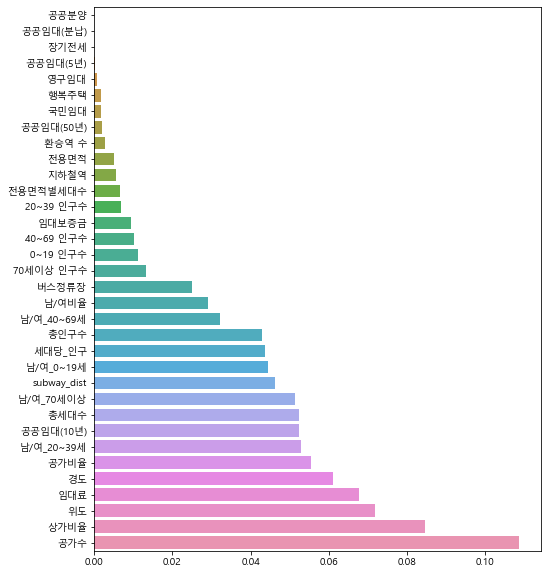

In [114]:
plt.figure(figsize=(8,10))
sns.barplot(y = X_test.columns[np.argsort(rf.feature_importances_)], x = list(rf.feature_importances_[np.argsort(rf.feature_importances_)]))

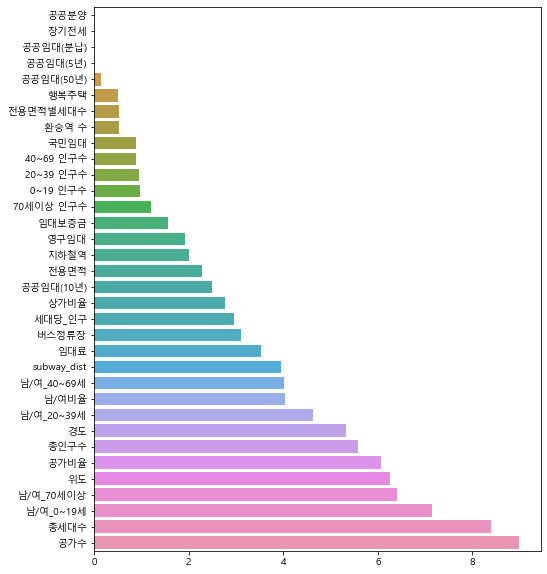

In [115]:
plt.figure(figsize=(8,10))
sns.barplot(y = X_test.columns[np.argsort(cb.feature_importances_)], x = list(cb.feature_importances_[np.argsort(cb.feature_importances_)]))

In [116]:
set(test.columns) - set(train.columns)

set()

In [117]:
col = ['단지코드','등록차량수','임대건물구분','subway_name','단지명','도로명주소','연면적','total','지역','단지내주차면수','y1','y2','공급유형','연면적','단지내주차면수_new','index']
X_train = train.drop(col,axis=1)
y_train = train['y2']
col = ['단지코드','임대건물구분','subway_name','단지명','도로명주소','연면적','total','지역','단지내주차면수','공급유형','연면적','단지내주차면수_new']
X_test = test.drop(col,axis=1)

rf = RandomForestRegressor(random_state=2021).fit(X_train,y_train)
pred = rf.predict(X_test)

cb = CatBoostRegressor(random_state=2021,loss_function='MAE',verbose=False).fit(X_train,y_train)
pred2 = cb.predict(X_test)

In [118]:
test['y2pred_rf'] = pred
test['y1pred_rf'] = test['단지내주차면수_new']*test['y2pred_rf']
test['y2pred_cb'] = pred2
test['y1pred_cb'] = test['단지내주차면수_new']*test['y2pred_cb']
res = pd.DataFrame()
res['단지코드'] = test['단지코드'].unique()
res['rf'] = test.groupby(['단지코드']).sum()['y1pred_rf'].tolist()
res['cb'] = test.groupby(['단지코드']).sum()['y1pred_cb'].tolist()
res['지역'] = test.groupby(['단지코드'])['지역'].unique().tolist()
res['공급유형'] = test.groupby(['단지코드'])['공급유형'].unique().tolist()
res['단지내주차면수'] = test.groupby(['단지코드']).mean()['단지내주차면수'].tolist()

In [119]:
mae94 = pd.read_csv("result/MAE_94.csv")
mae96 = pd.read_csv("0728.csv")

In [120]:
final = pd.merge(res[['단지코드','rf','cb']],mae94,left_on='단지코드',right_on='code',how='left').rename(columns={'num':'mae94'})
final = pd.merge(final,mae96,left_on='단지코드',right_on='code',how='left').rename(columns={'num':'mae96'})
final = final.drop(['code_x','code_y'],axis=1)

In [121]:
code = test[test['단지내주차면수']<=987]['단지코드'].unique()
tmp = final[-final['단지코드'].isin(code)]

In [122]:
submit = final[['단지코드','rf']]
submit.columns = ['code','num']
submit.loc[147,:] = ['C1327',0]
submit.loc[148,:] = ['C2335',0]
submit.loc[149,:] = ['C2675',0]

In [123]:
submit.to_csv("0728.csv",index=False)

In [124]:
print(mean_absolute_error(final['rf'],final['mae96']))
print(mean_absolute_error(final['cb'],final['mae96']))

3.3206997242665904e-14
34.705071431366044


In [125]:
print(mean_absolute_error(tmp['rf'],tmp['mae96']))
print(mean_absolute_error(tmp['cb'],tmp['mae96']))

4.786814219857517e-14
74.72949098770418


In [126]:
def plot(x):
    df = area[area['지역']==x]
    n = df['공급유형'].nunique()
    fig,ax = plt.subplots(n,1,figsize=(25,15))
    for ind,i in enumerate(df['공급유형'].unique()):
        df1 = df[df['공급유형']==i]
        sns.histplot(data=df1,x='y2',ax=ax[ind],bins=20,label=x+i)
        ax[ind].legend()

In [ ]:
for i in train['지역'].unique():
    plot(i)

In [ ]:
area[(area['지역']=='전라북도')&(area['공급유형']=='행복주택')][['단지코드','y2']]

In [ ]:
def plot2():
    n = train['지역'].nunique()
    fig,ax = plt.subplots(n,1,figsize=(15,60))
    for ind,i in enumerate(train['지역'].unique()):
        df = train[train['지역']==i]
        sns.histplot(data=df,x='y2',ax=ax[ind],bins=20,label=i)
        ax[ind].legend()

In [ ]:
plot2()